# Data Pre-processing

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [160]:
raw_data1 = pd.read_csv(r"D:\github\texture_haptic\raw_data\s3_f175_i004.txt", names=["Timestamp", "Platform", "Rotary","Rotary Velocity","Estimated Force"])
#raw_data2 = pd.read_csv(r"D:\github\texture_haptic\raw_data\s2_f175_i001.txt", names=["Timestamp", "Platform", "Rotary","Rotary Velocity","Estimated Force"])

# Feature Extraction

In [161]:
I = 0.175

In [162]:
time_now = pd.DataFrame({'Timestamp':raw_data1['Timestamp']})
time_prev = pd.DataFrame({'Timestamp':raw_data1['Timestamp']})
row = pd.DataFrame({'Timestamp': [0]})
time_prev = pd.concat([row,time_prev.loc[:]]).reset_index(drop=True)
time_prev = time_prev.drop(time_prev.index[-1])
raw_data1['dt'] = time_now['Timestamp'] - time_prev['Timestamp'] 

In [163]:
dt = raw_data1['dt']
Platform_now = pd.DataFrame({'Platform':raw_data1['Platform']})
Platform_prev = pd.DataFrame({'Platform':raw_data1['Platform']})
row = pd.DataFrame({'Platform': [0]})
Platform_prev = pd.concat([row,Platform_prev.loc[:]]).reset_index(drop=True)
Platform_prev = Platform_prev.drop(Platform_prev.index[-1])
difference = (Platform_now['Platform'] - Platform_prev['Platform'] )
raw_data1['Platform Velocity'] = difference.div(dt)
raw_data1['Platform Velocity'] = raw_data1['Platform Velocity'].rolling(10).mean()*1e-6

#df["result"] = df["col1"]/df["col2"]
dt

0         0.000155
1         0.000108
2         0.000093
3         0.000028
4         0.000028
            ...   
399995    0.000020
399996    0.000019
399997    0.000019
399998    0.000020
399999    0.000019
Name: dt, Length: 400000, dtype: float64

In [164]:
Rotary_now = pd.DataFrame({'Rotary':raw_data1['Rotary']})
Rotary_prev = pd.DataFrame({'Rotary':raw_data1['Rotary']})
row = pd.DataFrame({'Rotary': [0]})
Rotary_prev = pd.concat([row,Rotary_prev.loc[:]]).reset_index(drop=True)
Rotary_prev = Rotary_prev.drop(Rotary_prev.index[-1])
difference = (Rotary_now['Rotary'] - Rotary_prev['Rotary'] )
#raw_data1['Rotary Velocity'] = difference.div(dt)
#raw_data1['Rotary Velocity'] = raw_data1['Rotary Velocity'].rolling(300).mean()*1e-6


In [165]:
raw_data1['Impdence_Pos'] = raw_data1['Estimated Force']/raw_data1['Rotary']
raw_data1['Impedence_Vel'] = raw_data1['Estimated Force']/raw_data1['Rotary Velocity']

In [166]:
raw_data1['Current'] = [I]*len(raw_data1)

In [167]:
raw_data1

,Timestamp,Platform,Rotary,Rotary Velocity,Estimated Force,dt,Platform Velocity,Impdence_Pos,Impedence_Vel,Current
0,0.000155,0,0,0.000000,0.000000,0.000155,NaN,NaN,NaN,0.175
1,0.000263,0,0,0.000000,0.032074,0.000108,NaN,inf,inf,0.175
2,0.000356,0,0,0.000000,0.059097,0.000093,NaN,inf,inf,0.175
3,0.000384,0,0,0.000000,0.067082,0.000028,NaN,inf,inf,0.175
4,0.000412,0,0,0.000000,0.075021,0.000028,NaN,inf,inf,0.175
...,...,...,...,...,...,...,...,...,...,...
399995,7.845112,89983,-155,0.002003,1.484908,0.000020,0.015526,-0.00958,741.341987,0.175
399996,7.845131,89983,-155,0.001991,1.484909,0.000019,0.015526,-0.00958,745.810648,0.175
399997,7.845150,89984,-155,0.001980,1.484909,0.000019,0.020789,-0.00958,749.954040,0.175
399998,7.845170,89984,-155,0.001968,1.484910,0.000020,0.020789,-0.00958,754.527439,0.175


In [168]:
start1 = np.where([raw_data1['Timestamp']<1])
start1 = start1[1][-1]

end1 = np.where([raw_data1['Timestamp']>7.3])
end1 = end1[1][0]

#start2 = np.where([raw_data2['Timestamp']<4])
#start2 = start2[1][-1]

#end2 = np.where([raw_data2['Timestamp']>5.5])
#end2 = end2[1][0]

In [169]:
sliced_data1 = raw_data1[start1+1:end1]
sliced_data1

#sliced_data2 = raw_data2[start2+1:end2]
#sliced_data2

,Timestamp,Platform,Rotary,Rotary Velocity,Estimated Force,dt,Platform Velocity,Impdence_Pos,Impedence_Vel,Current
51174,1.000002,4499,-118,0.000018,1.484930,0.000019,0.010263,-0.012584,82496.111111,0.175
51175,1.000022,4499,-118,0.000018,1.484930,0.000020,0.005000,-0.012584,82496.111111,0.175
51176,1.000041,4499,-118,0.000018,1.484930,0.000019,0.005000,-0.012584,82496.111111,0.175
51177,1.000060,4499,-118,0.000018,1.484930,0.000019,0.005000,-0.012584,82496.111111,0.175
51178,1.000080,4499,-118,0.000018,1.484930,0.000020,0.005000,-0.012584,82496.111111,0.175
...,...,...,...,...,...,...,...,...,...,...
372162,7.299909,81445,-157,0.001121,1.484932,0.000019,0.010263,-0.009458,1324.649420,0.175
372163,7.299929,81445,-157,0.001114,1.484932,0.000020,0.010263,-0.009458,1332.973070,0.175
372164,7.299948,81445,-157,0.001107,1.484933,0.000019,0.010263,-0.009458,1341.402891,0.175
372165,7.299967,81446,-157,0.001101,1.484933,0.000019,0.015526,-0.009458,1348.712988,0.175


In [170]:
Timestamp1 = sliced_data1['Timestamp'] 
Platform_disp1 = sliced_data1['Platform']
Rotary_disp1 = sliced_data1['Rotary']*5-sliced_data1['Rotary'].mean()*5
sliced_data1['Rotary'] = Rotary_disp1

#Timestamp2 = sliced_data2['Timestamp'] 
#Platform_disp2 = sliced_data2['Platform']
#Rotary_disp2 = sliced_data2['Rotary']*5-sliced_data2['Rotary'].mean()*5
#sliced_data2['Rotary'] = Rotary_disp2


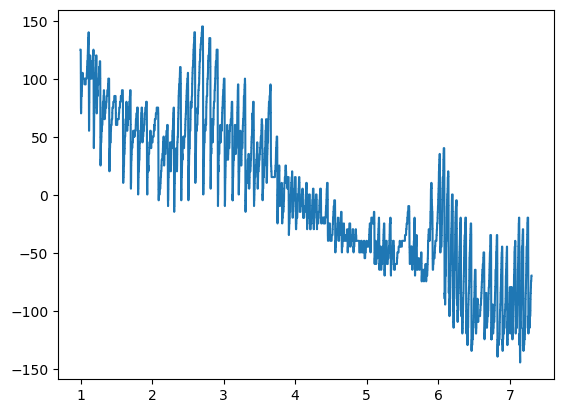

In [171]:
fig = plt.figure()
plt.plot(Timestamp1,Rotary_disp1)
#plt.plot(Timestamp2,Rotary_disp2)

In [172]:
sliced_data1['Timestamp'] = sliced_data1['Timestamp'] - sliced_data1.iloc[0]['Timestamp']

# Slicing and Writing to seperate files (52450 per file)

In [173]:
#Slice_count = np.where([sliced_data1['Timestamp']<=4])
#Slice_count = Slice_count[1][-1]
Slice_count = 52450

In [174]:
sliced_data1 = sliced_data1.drop("dt",axis=1)

In [175]:
for i in range(6):
    data = sliced_data1[i*(Slice_count):(i+1)*(Slice_count)]
    data['Timestamp'] = data['Timestamp'] - data.iloc[0]['Timestamp']
    data['Platform'] = data['Platform'] - data.iloc[0]['Platform']
    data['Rotary'] = data['Rotary'] - data['Rotary'].mean() 
    data.to_csv(r"D:\FYP_ML\sliced_data\s3_f175_i004_" + str(i+1) +".csv",index=False)
